# K Nearest Neighbor 

Originally From https://www.kaggle.com/code/skalskip/iris-data-visualization-and-knn-classification/notebook with some modifications

### 1. KNN Theory

#### 1.1 Type of algorithm

KNN can be used for both classification and regression predictive problems. KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations $(x,y)$ and would like to capture the relationship between $x$ and $y$. More formally, our goal is to learn a function $h: X\rightarrow Y$ so that given an unseen observation $x$, $h(x)$ can confidently predict the corresponding output $y$.


#### 1.2 Distance measure

In the classification setting, the K-nearest neighbor algorithm essentially boils down to forming a majority vote between the K most similar instances to a given “unseen” observation. Similarity is defined according to a distance metric between two data points. The k-nearest-neighbor classifier is commonly based on the Euclidean distance between a test sample and the specified training samples. Let $x_{i}$ be an input sample with $p$ features $(x_{i1}, x_{i2},..., x_{ip})$, $n$ be the total number of input samples $(i=1,2,...,n)$.  The Euclidean distance between sample $x_{i}$ and $x_{l}$ is is defined as: 


$$d(x_{i}, x_{l}) = \sqrt{(x_{i1} - x_{l1})^2 + (x_{i2} - x_{l2})^2 + ... + (x_{ip} - x_{lp})^2}$$

Sometimes other measures can be more suitable for a given setting and include the Manhattan, Chebyshev and Hamming distance.

#### 1.3 Algorithm steps

STEP 1: Choose the number K of neighbors

STEP 2: Take the K nearest neighbors of the new data point, according to your distance metric

STEP 3: Among these K neighbors, count the number of data points to each category

STEP 4: Assign the new data point to the category where you counted the most neighbors

### 2. Importing and preperation of data

#### 2.1 Import libraries

In [4]:
import numpy as np
import pandas as pd

#### 2.2 Load dataset

NOTE: Iris dataset includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

In [5]:
# Importing the dataset
dataset = pd.read_csv('sample_data/Iris.csv')

#### 2.3 Summarize the Dataset

In [1]:
sns.pairplot(dataset.drop("Id", axis=1), hue = "species", size=3, markers=["o", "s", "D"])

NameError: ignored

In [ ]:
dataset.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count.
dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

#### 2.4 Dividing data into features and labels

NOTE: As we can see dataset contain six columns: Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm and Species. The actual features are described by columns 1-4. Last column contains labels of samples. Firstly we need to split data into two arrays: X (features) and y (labels).

In [ ]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = dataset[feature_columns].values
y = dataset['Species'].values

# Alternative way of selecting features and labels arrays:
# X = dataset.iloc[:, 1:5].values
# y = dataset.iloc[:, 5].values

In [ ]:
X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [ ]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

#### 2.5 Label encoding

NOTE: As we can see labels are categorical. KNeighborsClassifier does not accept string labels. We need to use LabelEncoder to transform them into numbers. Iris-setosa correspond to 0, Iris-versicolor correspond to 1 and Iris-virginica correspond to 2.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### 2.6 Spliting dataset into training set and test set

Let's split dataset into training set and test set, to check later on whether or not our classifier works correctly.

In [ ]:
from sklearn.model_selection import train_test_split #Need to change to from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Lastly, because features values are in the same order of magnitude, there is no need for feature scaling. Nevertheless in other sercostamses it is extremly important to apply feature scaling before running classification algorythms.

### 3. Data Visualization

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

#### 3.0. Basic Visualization

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


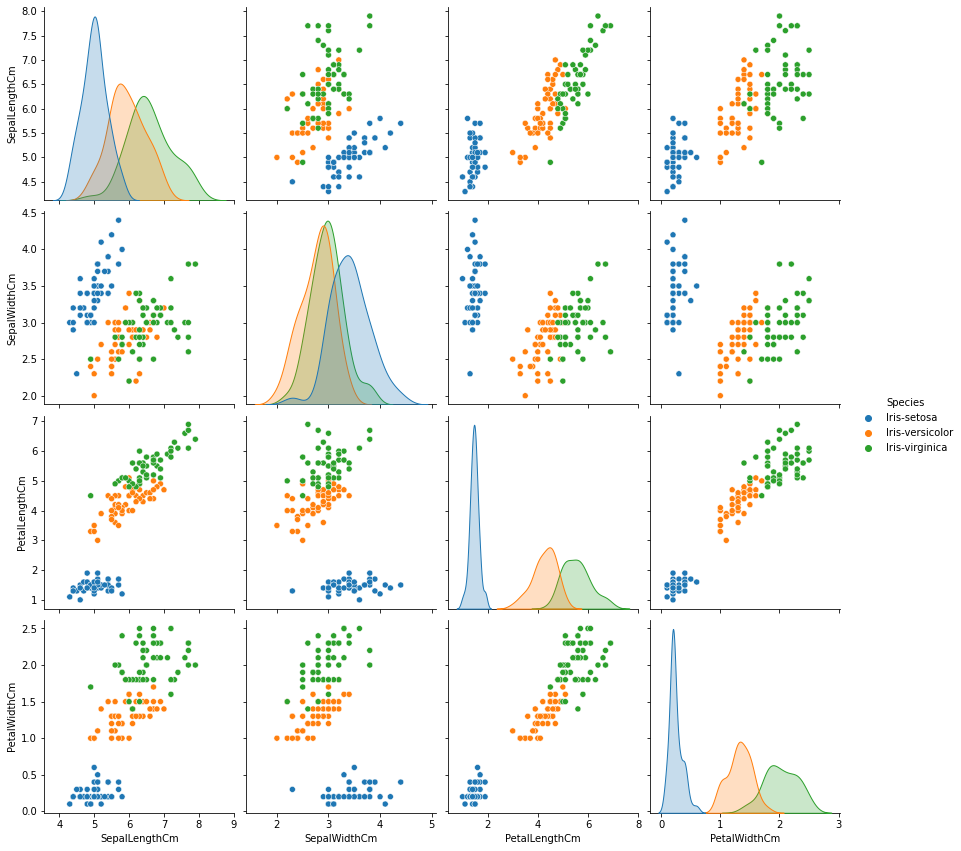

In [10]:
sns.pairplot(dataset.drop("Id", axis=1), hue = "Species", size=3)

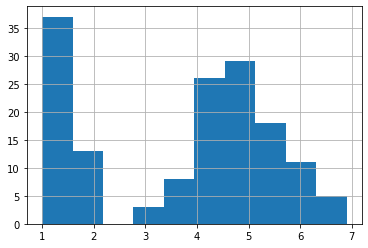

In [ ]:
dataset["PetalLengthCm"].hist(bins=10)

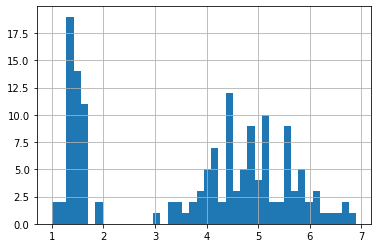

In [ ]:
dataset["PetalLengthCm"].hist(bins=42)

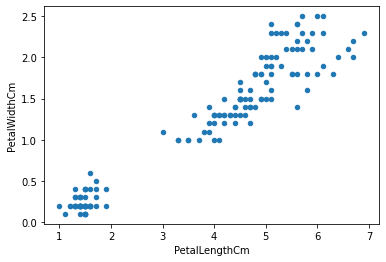

In [ ]:
dataset.plot.scatter('PetalLengthCm','PetalWidthCm')

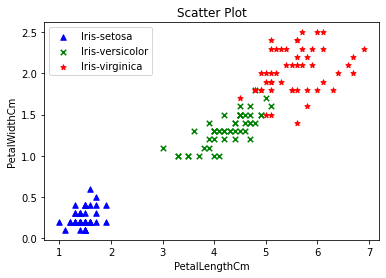

In [ ]:
plt.scatter(dataset.iloc[0:50, 3], dataset.iloc[0:50, 4], s = 30, c = 'blue', marker='^', label = 'Iris-setosa')
plt.scatter(dataset.iloc[50:100, 3], dataset.iloc[50:100, 4], s = 30, c = 'green', marker='x', label = 'Iris-versicolor')
plt.scatter(dataset.iloc[100:150, 3], dataset.iloc[100:150, 4], s = 30, c = 'red', marker='*', label = 'Iris-virginica')
plt.title('Scatter Plot')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()
plt.show()


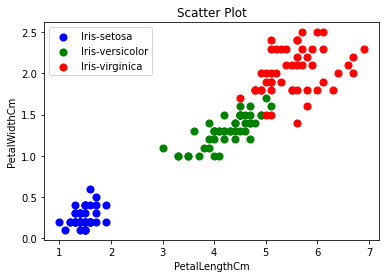

In [ ]:
plt.scatter(dataset.iloc[y==0, 3], dataset.iloc[y==0, 4], s = 50, c = 'blue', label = 'Iris-setosa')
plt.scatter(dataset.iloc[y==1, 3], dataset.iloc[y==1, 4], s = 50, c = 'green', label = 'Iris-versicolor')
plt.scatter(dataset.iloc[y==2, 3], dataset.iloc[y==2, 4], s = 50, c = 'red', label = 'Iris-virginica')
plt.title('Scatter Plot')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()
plt.show()

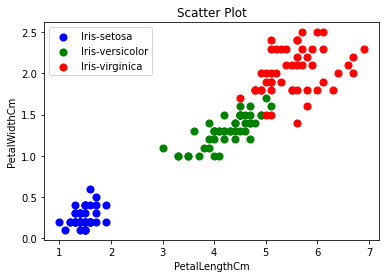

In [ ]:
plt.scatter(X[y==0, 2], X[y==0, 3], s = 50, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y==1, 2], X[y==1, 3], s = 50, c = 'green', label = 'Iris-versicolor')
plt.scatter(X[y==2, 2], X[y==2, 3], s = 50, c = 'red', label = 'Iris-virginica')
plt.title('Scatter Plot')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()
plt.show()

#### 3.1. Parallel Coordinates

Parallel coordinates is a plotting technique for plotting multivariate data. It allows one to see clusters in data and to estimate other statistics visually. Using parallel coordinates points are represented as connected line segments. Each vertical line represents one attribute. One set of connected line segments represents one data point. Points that tend to cluster will appear closer together.

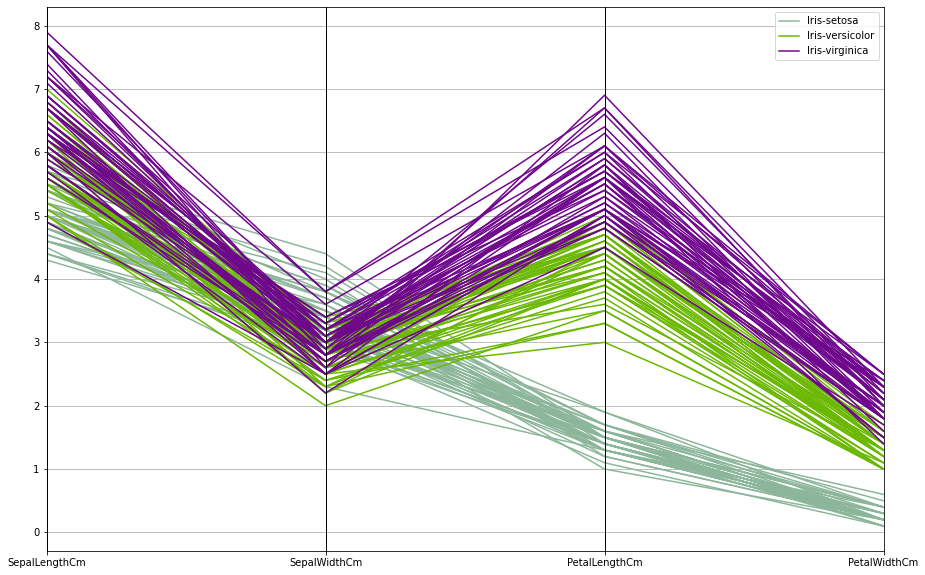

In [ ]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(dataset.drop("Id", axis=1), "Species")
plt.show()

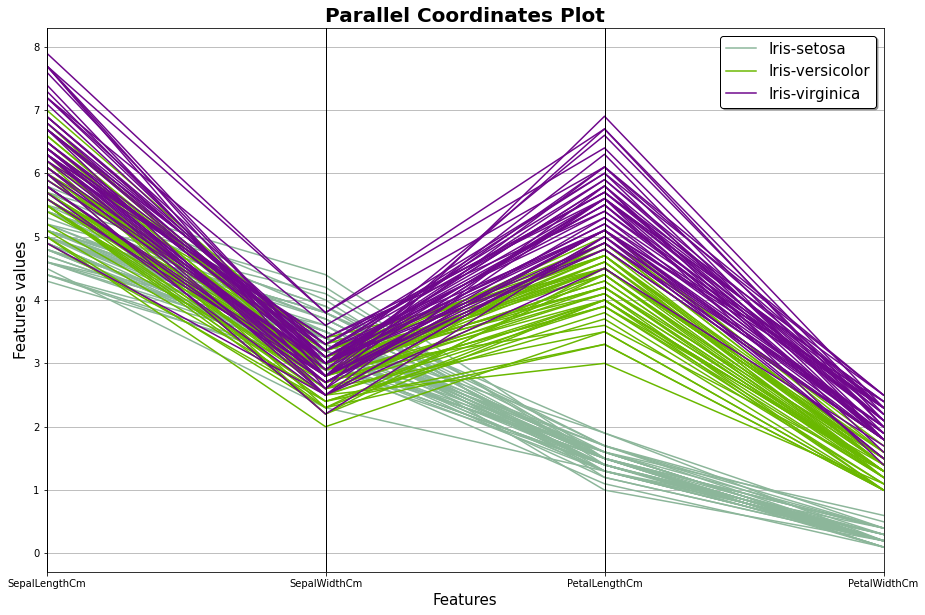

In [ ]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(dataset.drop("Id", axis=1), "Species")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

#### 3.2. Andrews Curves

Andrews curves allow one to plot multivariate data as a large number of curves that are created using the attributes of samples as coefficients for Fourier series. By coloring these curves differently for each class it is possible to visualize data clustering. Curves belonging to samples of the same class will usually be closer together and form larger structures.

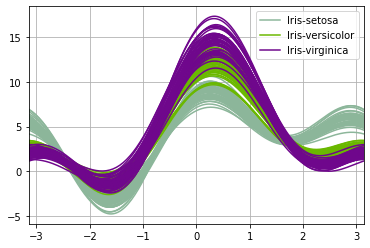

In [ ]:
from pandas.plotting import andrews_curves
andrews_curves(dataset.drop("Id", axis=1), "Species")

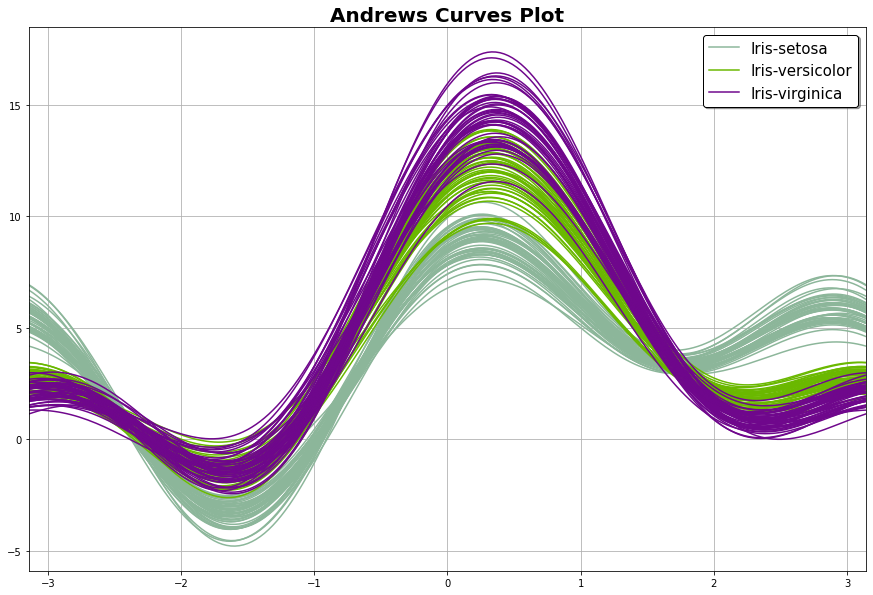

In [ ]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(dataset.drop("Id", axis=1), "Species")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

#### 3.3. Pairplot

Pairwise is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset.

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

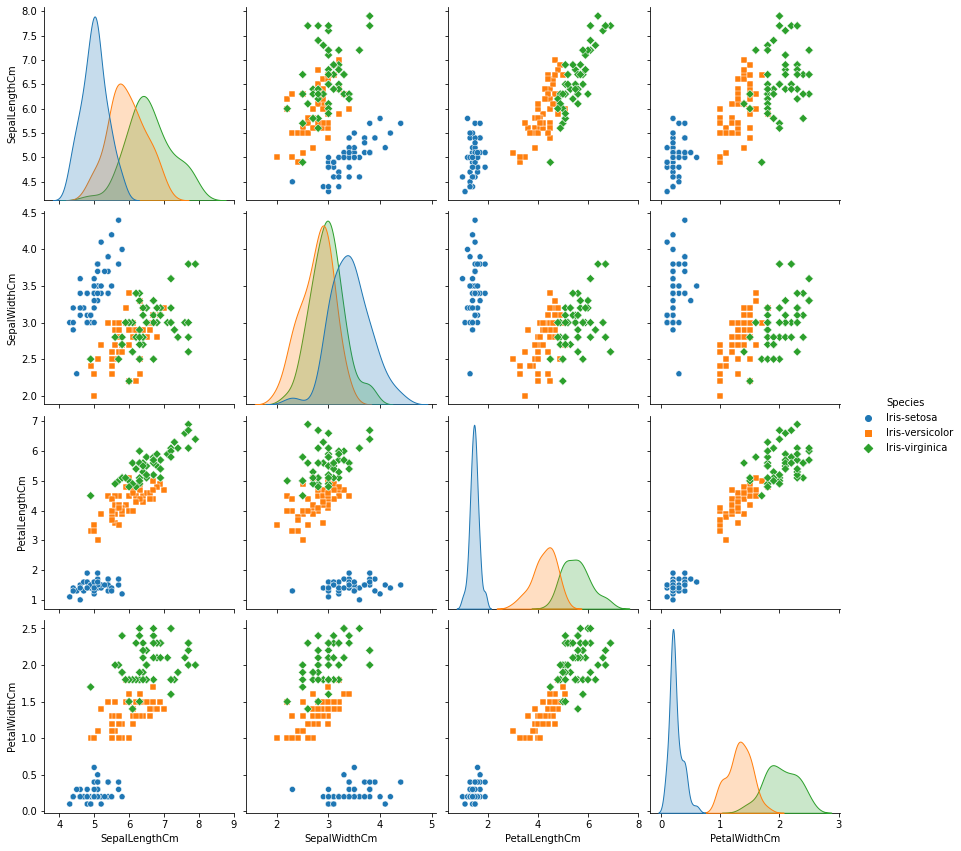

In [ ]:
plt.figure()
sns.pairplot(dataset.drop("Id", axis=1), hue = "Species", size=3, markers=["o", "s", "D"])
plt.show()

#### 3.4. Boxplots

<Figure size 432x288 with 0 Axes>

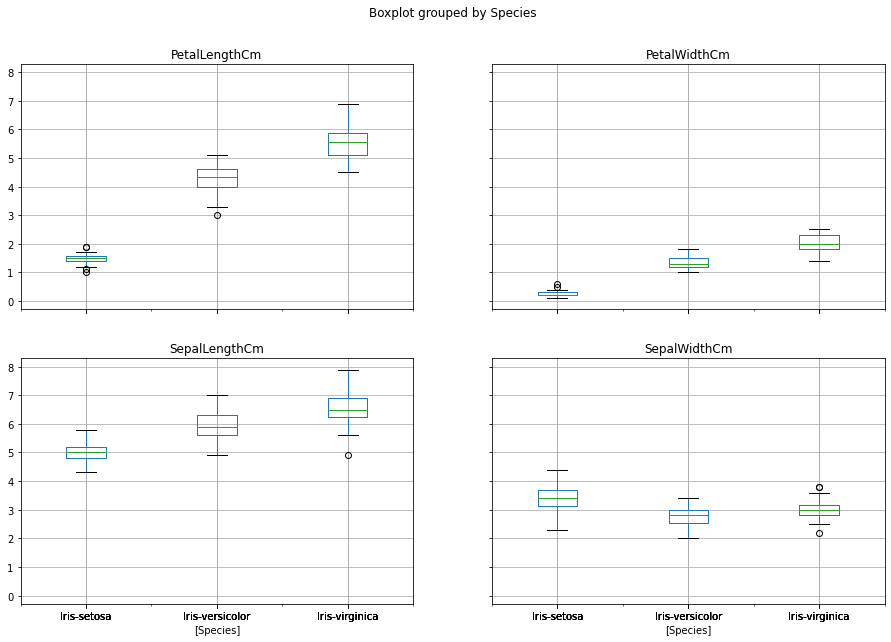

In [ ]:
plt.figure()
dataset.drop("Id", axis=1).boxplot(by="Species", figsize=(15, 10))
plt.show()

### 4. Using KNN for classification

#### 4.1. Making predictions

In [ ]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

#### 4.2. Evaluating predictions

Building confusion matrix:

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

Calculating model accuracy:

In [ ]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of k-NN model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of k-NN model is equal 96.67 %.


# **Bibliography**

1. MIT Lecture: https://www.youtube.com/watch?v=09mb78oiPkA
2. Iris dataset: https://www.kaggle.com/uciml/iris
3. Theory: http://www.scholarpedia.org/article/K-nearest_neighbor

4. https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/
5. https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/
6. https://www.analyticsvidhya.com/blog/2014/10/introduction-k-neighbours-algorithm-clustering/